In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("results_quali.csv", delimiter=";")

df["acc_err"] = df["acc"].str.split("-", expand=True)[1]
df["sen_err"] = df["sen"].str.split("-", expand=True)[1]
df["spe_err"] = df["spe"].str.split("-", expand=True)[1]
df["acc"] = df["acc"].str.split("+", expand=True)[0]
df["sen"] = df["sen"].str.split("+", expand=True)[0]
df["spe"] = df["spe"].str.split("+", expand=True)[0]

In [5]:
def generate_df(segment_size, quantity_bins, layers, range_hist, labels_x_col):
    sort_by = "acc" if labels_x_col == "range_hist" else labels_x_col
    df_test = df.loc[
        (df["segment_size"].isin(segment_size))
        & (df["quantity_bins"].isin(quantity_bins))
        & (df["layers"].isin(layers))
        & (df["range_hist"].isin(range_hist))
    ].sort_values(sort_by, ascending=True)
    return df_test


def generate_plot(df_test, labels_x, labels_x_col, y_label):
    x = np.arange(len(labels_x))
    y1 = df_test["acc"].astype("float").to_numpy()
    y2 = df_test["sen"].astype("float").to_numpy()
    y3 = df_test["spe"].astype("float").to_numpy()
    error1 = df_test["acc_err"].astype("float").to_numpy()
    error2 = df_test["sen_err"].astype("float").to_numpy()
    error3 = df_test["spe_err"].astype("float").to_numpy()

    width = 0.2

    colors = ["#A52A2A", "#000080", "#228B22"]

    _, ax = plt.subplots()
    ax.bar(
        x - width, y1, width, align="center", alpha=0.85, color=colors[0], label="ACC"
    )
    ax.bar(x, y2, width, align="center", alpha=0.85, color=colors[1], label="SEN")
    ax.bar(
        x + width, y3, width, align="center", alpha=0.85, color=colors[2], label="SPE"
    )

    ax.errorbar(
        x - width, y1, yerr=error1, fmt="none", ecolor="black", capsize=5, alpha=0.3
    )
    ax.errorbar(x, y2, yerr=error2, fmt="none", ecolor="black", capsize=5, alpha=0.3)
    ax.errorbar(
        x + width, y3, yerr=error3, fmt="none", ecolor="black", capsize=5, alpha=0.3
    )

    lim_y_inf = round(float(df_test[["acc", "sen", "spe"]].values.min()), 2)
    lim_y_inf -= 0.01 if (lim_y_inf * 100) % 2 else 0.02
    lim_y_sup = 1.0

    ticks_y = list(range(int(lim_y_inf * 100), int(lim_y_sup * 100), 2))
    ticks_y = [round(tick, 2) / 100 for tick in ticks_y]
    ticks_y.insert(0, 0)
    ticks_y.append(lim_y_sup)

    ax.set_xticks(x)
    ax.set_xticklabels(labels_x, fontdict={"fontsize": 9})
    ax.set_yticklabels(ticks_y, minor=True, fontdict={"fontsize": 9})
    ax.legend()

    ax.set_ylim(lim_y_inf, lim_y_sup)
    plt.ylabel("Score")
    plt.xlabel(y_label)

    ax.set_xlim(-0.3 - 0.1, 4.3 + 0.1)

    ax.plot(
        x - width,
        y1,
        width,
        linestyle="dashed",
        linewidth=1.5,
        alpha=0.3,
        color=colors[0],
        label="ACC",
    )
    ax.plot(
        x,
        y2,
        width,
        linestyle="dashed",
        linewidth=1.5,
        alpha=0.3,
        color=colors[1],
        label="SEN",
    )
    ax.plot(
        x + width,
        y3,
        width,
        linestyle="dashed",
        linewidth=1.5,
        alpha=0.3,
        color=colors[2],
        label="SPE",
    )

    plt.show()

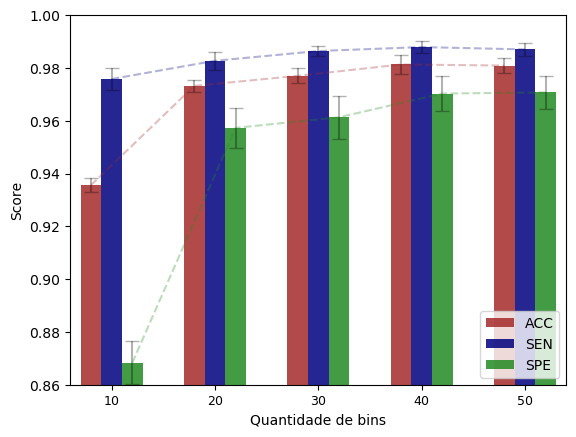

,exec_time,acc,sen,spe,segment_size,quantity_bins,quantity_segments,range_hist,layers,acc_err,sen_err,spe_err
414,00:00:13,0.9356,0.9758,0.8683,50,10,15000,"(50, 2500)","(50, 50)",0.0026,0.0042,0.0081
434,00:00:13,0.9732,0.9827,0.9573,50,20,15000,"(50, 2500)","(50, 50)",0.0023,0.0033,0.0076
454,00:00:16,0.977,0.9864,0.9613,50,30,15000,"(50, 2500)","(50, 50)",0.0028,0.002,0.0081
474,00:00:15,0.9813,0.9879,0.9703,50,40,15000,"(50, 2500)","(50, 50)",0.0036,0.0024,0.0068
494,00:00:15,0.9809,0.987,0.9707,50,50,15000,"(50, 2500)","(50, 50)",0.0028,0.0024,0.0061


In [6]:
# Quantidade de bins
segment_size = [50]
quantity_bins = [10, 20, 30, 40, 50]
layers = ["(50, 50)"]
range_hist = ["(50, 2500)"]

labels_x_col = "quantity_bins"
df_test = generate_df(segment_size, quantity_bins, layers, range_hist, labels_x_col)
labels_x = df_test[labels_x_col]
y_label = "Quantidade de bins"

generate_plot(df_test, labels_x, labels_x_col, y_label)

df_test

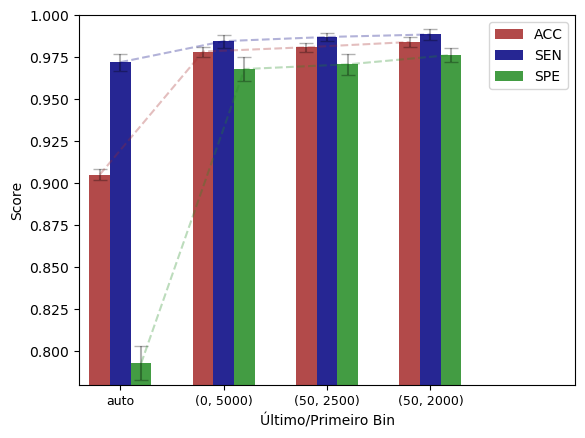

,exec_time,acc,sen,spe,segment_size,quantity_bins,quantity_segments,range_hist,layers,acc_err,sen_err,spe_err
484,00:00:15,0.9051,0.972,0.7928,50,50,15000,auto,"(50, 50)",0.0031,0.0051,0.01
489,00:00:15,0.9783,0.9845,0.9679,50,50,15000,"(0, 5000)","(50, 50)",0.003,0.0038,0.0069
494,00:00:15,0.9809,0.987,0.9707,50,50,15000,"(50, 2500)","(50, 50)",0.0028,0.0024,0.0061
499,00:00:16,0.984,0.9885,0.9763,50,50,15000,"(50, 2000)","(50, 50)",0.0027,0.0034,0.004


In [7]:
# Último/Primeiro Bin
segment_size = [50]
quantity_bins = [50]
layers = ["(50, 50)"]
range_hist = ["(0, 5000)", "(50, 2500)", "(50, 2000)", "auto"]

labels_x_col = "range_hist"
df_test = generate_df(segment_size, quantity_bins, layers, range_hist, labels_x_col)
labels_x = df_test[labels_x_col]
y_label = "Último/Primeiro Bin"

generate_plot(df_test, labels_x, labels_x_col, y_label)

df_test

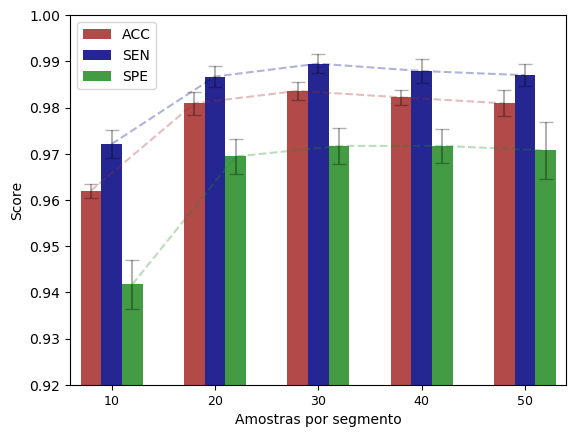

,exec_time,acc,sen,spe,segment_size,quantity_bins,quantity_segments,range_hist,layers,acc_err,sen_err,spe_err
94,00:00:15,0.962,0.9721,0.9417,10,50,15000,"(50, 2500)","(50, 50)",0.0015,0.003,0.0054
194,00:00:16,0.9809,0.9867,0.9694,20,50,15000,"(50, 2500)","(50, 50)",0.0025,0.0023,0.0037
294,00:00:16,0.9836,0.9895,0.9717,30,50,15000,"(50, 2500)","(50, 50)",0.002,0.0021,0.0039
394,00:00:15,0.9822,0.9879,0.9717,40,50,15000,"(50, 2500)","(50, 50)",0.0017,0.0025,0.0036
494,00:00:15,0.9809,0.987,0.9707,50,50,15000,"(50, 2500)","(50, 50)",0.0028,0.0024,0.0061


In [8]:
# Amostras por segmento
segment_size = [10, 20, 30, 40, 50]
quantity_bins = [50]
layers = ["(50, 50)"]
range_hist = ["(50, 2500)"]

labels_x_col = "segment_size"
df_test = generate_df(segment_size, quantity_bins, layers, range_hist, labels_x_col)
labels_x = df_test[labels_x_col]
y_label = "Amostras por segmento"

generate_plot(df_test, labels_x, labels_x_col, y_label)

df_test

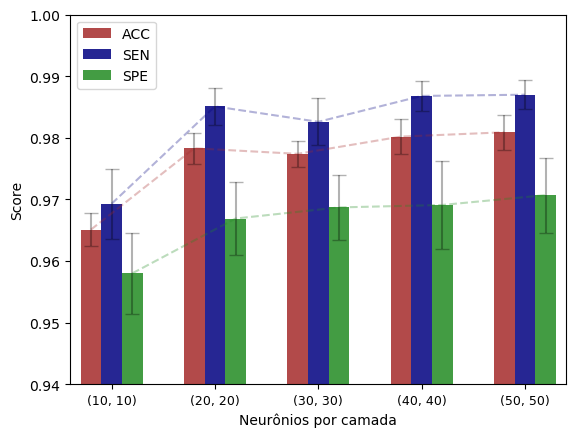

,exec_time,acc,sen,spe,segment_size,quantity_bins,quantity_segments,range_hist,layers,acc_err,sen_err,spe_err
490,00:00:15,0.9651,0.9693,0.958,50,50,15000,"(50, 2500)","(10, 10)",0.0027,0.0057,0.0066
491,00:00:39,0.9783,0.9851,0.9669,50,50,15000,"(50, 2500)","(20, 20)",0.0025,0.003,0.006
492,00:00:11,0.9774,0.9826,0.9687,50,50,15000,"(50, 2500)","(30, 30)",0.0021,0.0038,0.0053
493,00:00:13,0.9802,0.9868,0.9691,50,50,15000,"(50, 2500)","(40, 40)",0.0028,0.0024,0.0072
494,00:00:15,0.9809,0.987,0.9707,50,50,15000,"(50, 2500)","(50, 50)",0.0028,0.0024,0.0061


In [9]:
# Neurônios por camada'
segment_size = [50]
quantity_bins = [50]
layers = ["(50, 50)", "(40, 40)", "(30, 30)", "(20, 20)", "(10, 10)"]
range_hist = ["(50, 2500)"]

labels_x_col = "layers"
df_test = generate_df(segment_size, quantity_bins, layers, range_hist, labels_x_col)
labels_x = df_test[labels_x_col]
y_label = "Neurônios por camada"

generate_plot(df_test, labels_x, labels_x_col, y_label)

df_test